<a href="https://colab.research.google.com/github/RFHertel/ESOF-4011/blob/main/Lab7_Sentiment_Analysis_DCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis with DCNN ESOF 4011 Lab 7 Solution**

## Lab Instructor: Robert Hertel

Note: Please share all links with me in the future by pressing share in the top right corner

Introduction Format:

Student Name: Robert Hertel

Sudent ID: XXXXXX

Lab No.: 7

Colab link: https://colab.research.google.com/drive/1EUP46sgm0w5-NTvFQc_tczBRhadgK5Vo#scrollTo=Bt7gG8jggxuE



#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import re
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import imdb
from keras.layers import Conv1D

#Load the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
movie_reviews = pd.read_csv("/content/drive/MyDrive/Labs for AI/Lab 7 - Sentiment Analysis DNN/IMDB Dataset.csv/IMDB Dataset.csv")

movie_reviews.isnull().values.any()

movie_reviews.shape

(50000, 2)

In [ ]:
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
movie_reviews["review"][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

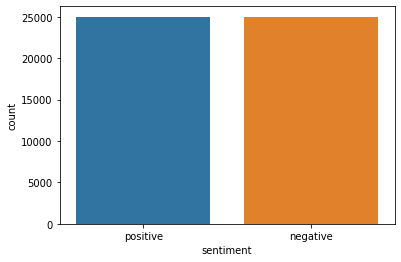

In [ ]:
sns.countplot(x='sentiment', data=movie_reviews)

#Data Preprocessing

Using the re library make the text form full sentences without needless characters

In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
movie_reviews['review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [ ]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
X[2]

'I thought this was wonderful way to spend time on too hot summer weekend sitting in the air conditioned theater and watching light hearted comedy The plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer While some may be disappointed when they realize this is not Match Point Risk Addiction thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love This was the most d laughed at one of Woody comedies in years dare say decade While ve never been impressed with Scarlet Johanson in this she managed to tone down her sexy image and jumped right into average but spirited young woman This may not be the crown jewel of his career but it was wittier than Devil Wears Prada and more interesting than Superman great comedy to go see with friends '

In [ ]:
y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [ ]:
y[2]

1

In [ ]:
X_train_init, X_test_init, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
num_words = 5000 

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train_init)

X_train = tokenizer.texts_to_sequences(X_train_init)
X_test = tokenizer.texts_to_sequences(X_test_init)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 500

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
Embed = Embedding(num_words, 32, input_length=maxlen)

#Create Model

In [ ]:
def create_model(Embed): # top_words max_words || num_words, maxlen
    model = Sequential()
    model.add(Embed)
    model.add(Conv1D(128, 5, activation='relu'))  
    model.add(GlobalMaxPooling1D())
    #model.add(Dense(layer_1_units, activation='relu', input_shape=(image_size,))) If want to add another layer. It wasn't necessary in this case but can help
    #model.add(Dense(250, activation='relu'))
    model.add(Dense(10, activation='relu'))
    #model.add(Flatten())
    #model.add(Flatten())
    #model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Evaluate / plot model

In [ ]:
def train_model(model, x_train, y_train, x_test, y_test, epochs=10, batch_size=1):
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=2)
    
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))

    



In [ ]:
model = create_model(Embed = Embed)# top_words max_words || num_words, maxlen

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           160000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 496, 128)          20608     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 181,909
Trainable params: 181,909
Non-trainable params: 0
_________________________________________________________________


Epoch 1/2
313/313 - 4s - loss: 0.4633 - accuracy: 0.7735 - val_loss: 0.2880 - val_accuracy: 0.8786
Epoch 2/2
313/313 - 4s - loss: 0.2438 - accuracy: 0.9029 - val_loss: 0.2542 - val_accuracy: 0.8936


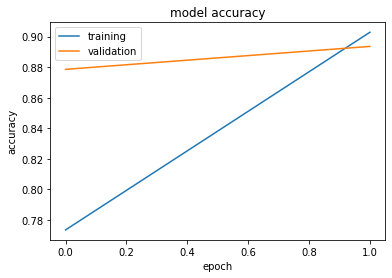

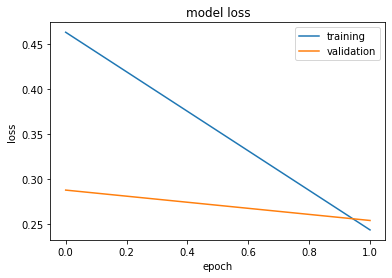

Accuracy: 89.36%


In [ ]:
train_model(model, X_train, y_train, X_test, y_test, epochs=2, batch_size=128)

# Predict Inndividually

In [ ]:
#Here print out the truth first and then the predictions of imdb reviews in the test set
test_sample_11 = X_test_init[30]
print(y_test[30])
test_sample_12 = X_test_init[31]
print(y_test[31])
test_sample_13 = X_test_init[32]
print(y_test[32])
test_sample_14 = X_test_init[33]
print(y_test[33])
test_sample_15 = X_test_init[34]
print(y_test[34])
test_sample_16 = X_test_init[35]
print(y_test[35])
test_sample_17 = X_test_init[36]
print(y_test[36])
test_sample_18 = X_test_init[37]
print(y_test[37])
test_sample_19 = X_test_init[38]
print(y_test[38])

test_samples = [test_sample_11, test_sample_12, test_sample_13, test_sample_14, test_sample_15, test_sample_16, test_sample_17, test_sample_18, test_sample_19]
test_sample_tokens = tokenizer.texts_to_sequences(test_samples) 

test_tokens_pad = pad_sequences(test_sample_tokens, maxlen=maxlen)
model.predict(x=test_tokens_pad)



0
1
0
0
1
0
0
0
0


array([[0.03100999],
       [0.5372879 ],
       [0.31412908],
       [0.1954169 ],
       [0.5176833 ],
       [0.14070708],
       [0.0030808 ],
       [0.19201434],
       [0.00190097]], dtype=float32)

In [ ]:
tf.keras.backend.clear_session()